## TP2 - Découverte de Networkx

### Exercice I.1 : Visualiser un graphe de la librairie Konect

Sur [Konect](http://konect.cc/), on trouve un très grand nombre d'exemples de graphes, allez jeter un oeil par curiosité. Dans cet exercice, nous allons faire nos premiers pas avec la librairie *networkx* afin de charger un graphe extrait de konect dans un objet Graph de la librairie puis de le visualiser.

- utiliser la fonction `urlretrieve(url, nomfichier)` du package urllib.request pour télécharger le fichier d'url `http://konect.cc/files/download.tsv.contiguous-usa.tar.bz2`
- utiliser le package *tarfile* pour décompresser le fichier compressé tar.bz2 
- lire le fichier `contiguous-usa/out.contiguous-usa` décompressé

**Question:** quel est le format de description du graphe dans ce fichier *out.contiguous-usa* ? Trouver dans la documentation networkx le moyen de lire un tel fichier pour en récupérer un graphe. Pour vous aider, en anglais, liste d'arêtes = edge list, liste d'adjacence = adjacency  list, matrice d'adjacence = adjacency matrix.

Utiliser `draw` du package networkx pour visualiser le graphe.

In [1]:
import urllib.request

print('Beginning file download with urllib2...')

url = 'http://konect.cc/files/download.tsv.contiguous-usa.tar.bz2'
urllib.request.urlretrieve(url, 'usa.bz2')

Beginning file download with urllib2...


('usa.bz2', <http.client.HTTPMessage at 0x7f551c0bd910>)

In [2]:
import tarfile
tar = tarfile.open("usa.bz2", "r:bz2")  
tar.extractall()
tar.close()

In [3]:
fichier=open("contiguous-usa/out.contiguous-usa")
print(fichier.read())

% sym unweighted
% 
1 2 
1 3 
1 4 
1 5 
6 7 
6 8 
6 4 
6 9 
6 5 
6 10 
11 12 
11 13 
11 14 
11 15 
12 14 
12 16 
17 18 
17 19 
17 13 
17 9 
17 15 
17 20 
21 22 
21 23 
21 24 
25 26 
25 27 
28 26 
28 29 
28 30 
2 3 
3 31 
3 32 
3 5 
33 34 
33 35 
33 8 
33 19 
33 36 
33 37 
38 39 
38 14 
38 16 
38 15 
38 40 
38 20 
34 41 
34 42 
34 8 
34 37 
41 42 
41 43 
41 44 
18 8 
18 19 
18 9 
42 8 
42 44 
42 5 
42 27 
42 45 
7 4 
7 10 
22 46 
22 23 
22 24 
22 47 
26 30 
26 27 
26 45 
48 46 
43 44 
43 37 
35 49 
35 36 
35 37 
8 19 
8 9 
8 5 
4 5 
39 49 
39 36 
39 20 
31 32 
31 5 
31 27 
49 36 
19 36 
19 20 
46 47 
29 23 
29 30 
13 9 
13 10 
14 16 
14 15 
23 30 
23 47 
44 30 
44 45 
9 10 
16 40 
30 45 
36 20 
5 27 
15 20 
27 45 



In [4]:
import networkx as nx
G = nx.read_edgelist("contiguous-usa/out.contiguous-usa",comments='%')

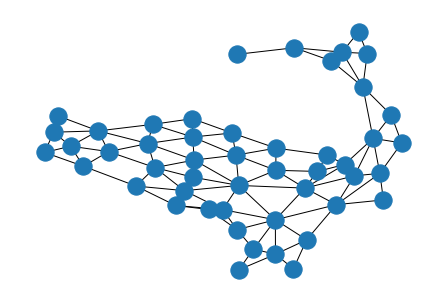

In [5]:
nx.draw(G)

### Exercice I.2 : Jouer avec les fonctions basiques de networkx

La cellule suivante permet de parser un graphe au format gml téléchargé automatiquement, puis de charger ce graphe sous forme d'objet networkx et de le stocker dans la variable *G*. Ce graphe représente un championnat de football américain universitaire. Les sommets sont des équipes et les arêtes des matches entre équipes.

Avec la fonction `draw_networkx`, afficher le graphe en vous assurant de :
- visualiser les noms des équipes, les labels
- rendre les sommets légèrement transparents pour que l'on puisse mieux voir les noms d'équipes
- afficher les sommets en gris
- mettre le nom des équipes en gras
- faire en sorte que la taille des sommets varie selon leur degré

In [6]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



**Astuce** :
G.degree() renvoie une liste de couple (id_sommet, degré)
Pour récupérer une liste de degrés seulement, on peut utiliser une notation Python très efficace : 
`degres = [degre for (id_sommet,degre) in G.degree()]`

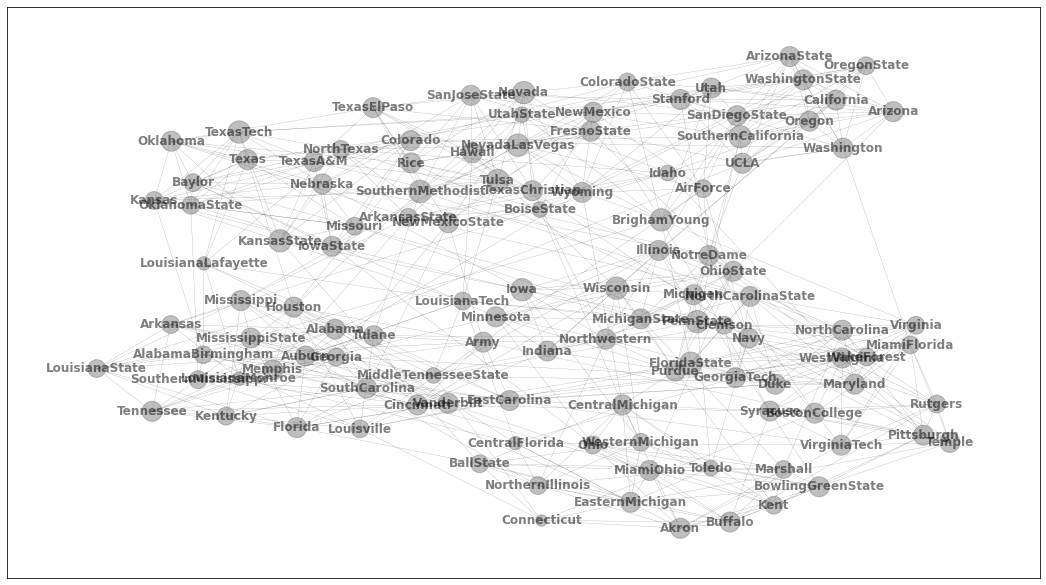

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

degrees = [val **2.5 for (node, val) in G.degree()]

options = {"node_color": "gray", "node_size": degrees, "width": 0.2, "with_labels":True, "font_color":"black", "font_weight":"bold", "ax":ax, "alpha": 0.5}

pos = nx.spring_layout(G,seed=1969)  # Seed for reproducible layout

nx.draw_networkx(G, pos,  **options)
plt.show()

Écrire le graphe sous forme de liste d'arêtes dans le fichier `football.edgelist` en utilisant l'attribut `edges` de l'objet graphe de newtorkx. Pour écrire dans le fichier que l'on a ouvert en mode "w" pour write, il suffit d'utiliser la fonction `write` sur fichier.

Si votre fichier est correctement écrit, la cellule d'après qui sert à lire un graphe au format edgelist permettra de visualiser le graphe de façon identique au précédent.

In [9]:
fichier=open("football.edgelist","w")
for u,v in G.edges:
    fichier.write(u+"\t"+v+"\n")
fichier.close()

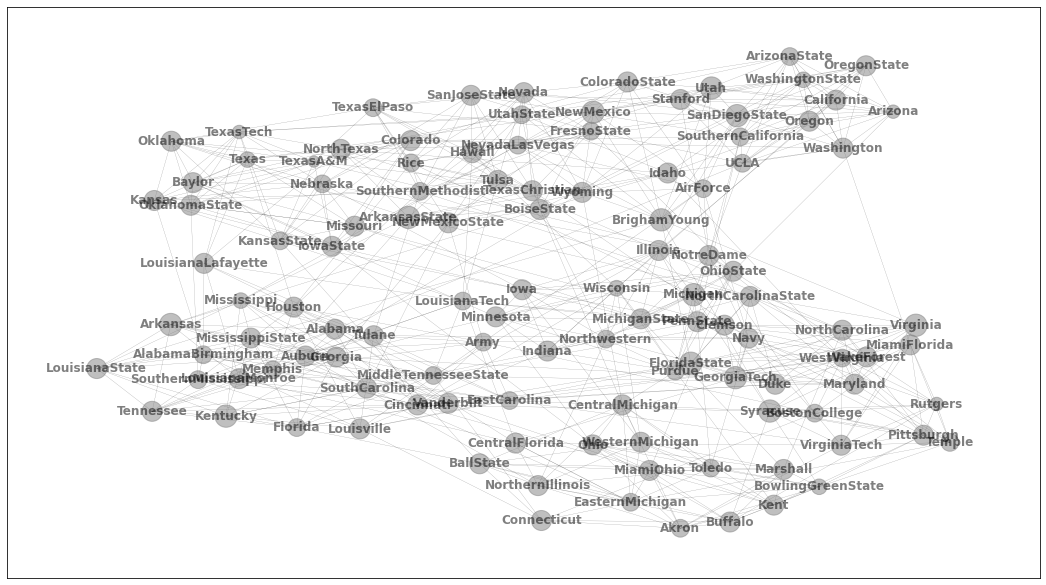

In [10]:
G = nx.read_edgelist("football.edgelist")

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
options = {"node_color": "gray", "node_size": degrees, "width": 0.2, "with_labels":True, "font_color":"black", "font_weight":"bold", "ax":ax, "alpha": 0.5}

nx.draw_networkx(G, pos,  **options)

En utilisant les fonctions `nodes` et `neighbors` de l'objet graphe, créer une fonction qui permet d'écrire le graphe sous forme de liste d'adjacence.

Puis, dans la cellule d'en dessous, écrire du code qui permette de lire le fichier écrit et de créer un graphe : vous utiliserez les fonctions `add_node` et `add_edge` de networkx pour peupler le graphe G initialisé.

Pour lire un fichier, on peut faire comme suit : 
```
fichier = open("nomFichier")
for ligne in fichier:
    ligne = ligne.strip() # supprime le caractère "\n" présent en fin de ligne
    tab = ligne.split(" ") # Sépare la ligne selon le caractère espace pour obtenir une liste d'éléments
...
```

Pour utiliser un set() qui est une structure de données de type ensemble, on peut utiliser des morceaux de code comme suit : 
```
p = set()
p.add(5)
if 5 in p:
    print("dedans")
else:
    print("il n'y est pas"):
```

In [156]:
fichier=open("football.adjacencylist","w")
for u in G.nodes():
    fichier.write(u)
    for v in G.neighbors(u):
        fichier.write("\t"+v)
    fichier.write("\n")
fichier.close()

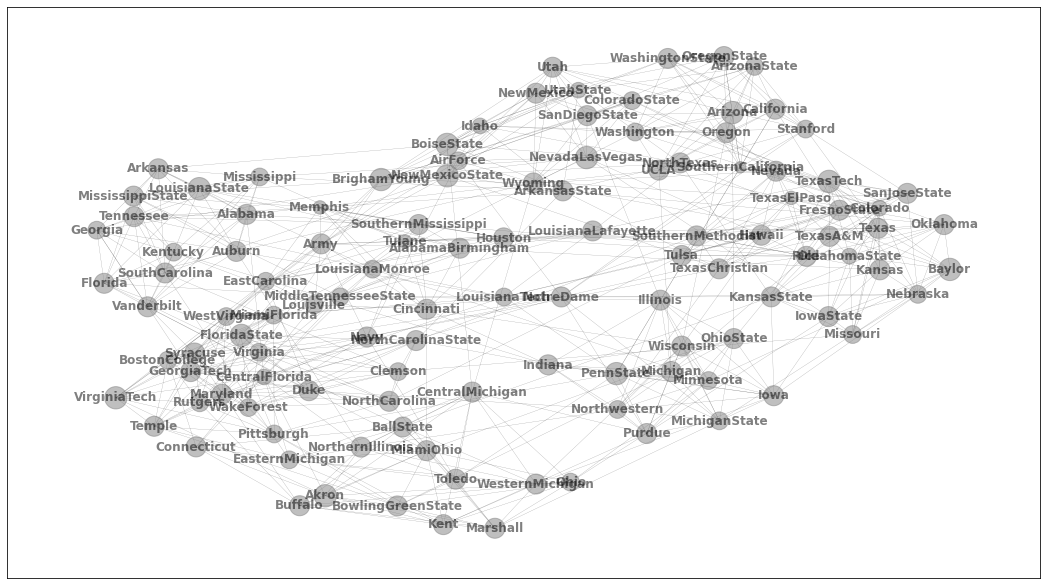

In [160]:
G = nx.Graph()
nodes=set()
fichier=open("football.adjacencylist")
for line in fichier:
    line=line.strip()
    tab = line.split("\t")
    u=tab[0]
    if u not in nodes:
        G.add_node(u)
        nodes.add(u)
    for v in tab[1:]:
        if v not in nodes:
            nodes.add(v)
            G.add_node(v)
        G.add_edge(u,v)
fichier.close()
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
options = {"node_color": "gray", "node_size": degrees, "width": 0.2, "with_labels":True, "font_color":"black", "font_weight":"bold", "ax":ax, "alpha": 0.5}

nx.draw_networkx(G, pos,  **options)
    

## Exercice II : Coder le parcours avec Networkx

Dans cet exercice, nous allons implémenter les parcours en largeur et en profondeur en utilisant networkx. Bien sûr, la librairie implémente déjà ces algos de parcours dont nous allons découvrir l'utilisation en premier lieu. Mais il s'agit de les réimplémenter en utilisant uniquement les fonctions nodes et neighbors. En effet, rien de mieux pour comprendre et retenir un algorithme que de l'implémenter !

Pour tester nos implémentations, nous allons utiliser un graphe issue de [konect.cc], le graphe Gene fusion. Dans ce graphe, les sommets sont des gènes et deux sommets sont connectés si leur fusion a été observée lors de l'émergence d'un cancer.

Beginning file download with urllib2...


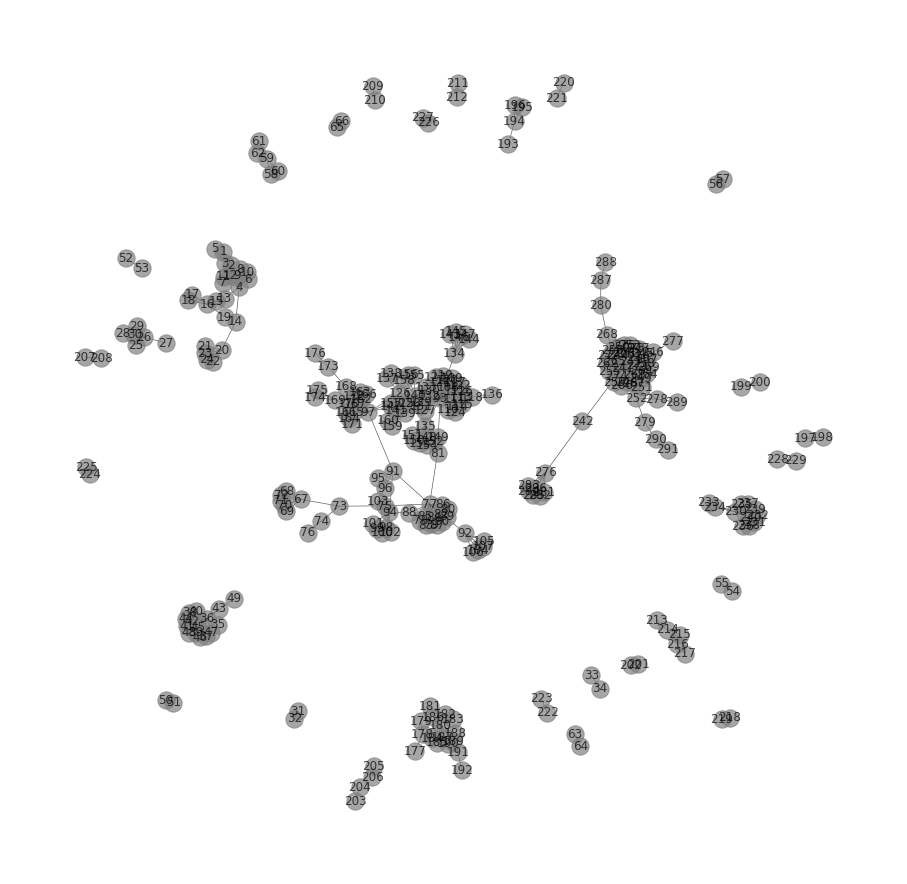

In [5]:
import urllib.request
import networkx as nx

print('Beginning file download with urllib2...')

url = 'http://konect.cc/files/download.tsv.gene_fusion.tar.bz2'
urllib.request.urlretrieve(url, 'gene_fusion.bz2')

import tarfile
tar = tarfile.open("gene_fusion.bz2", "r:bz2")  
tar.extractall()
tar.close()

G = nx.read_weighted_edgelist("gene_fusion/out.gene_fusion",comments='%')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
nx.draw_spring(G, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

Ce graphe est plutôt grand et difficile à visualiser. Ça n'est pas idéal pour expérimenter des parcours. En plus, il a de nombreuses composantes connexes. Pour nous faciliter la tâche, nous allons donc visualiser la composante connexe dans laquelle se trouve le sommet 14.

Comment réaliser cela simplement ?
- `nx.node_connected_component(graph, node)` retourne l'ensemble des sommets de la composante du noeud *node* dans le graphe *graph*
- `nx.induced_subgraph(graph, nodes)` retourne le sous-graphe induit par l'ensemble de sommet *nodes* dans le graphe *graph*

Il ne reste plus qu'à visualiser !

Attention, les nodes sont ici identifiés par des chaînes de caractères correspondant à leur numéro, "14" pour le sommet 14 donc.

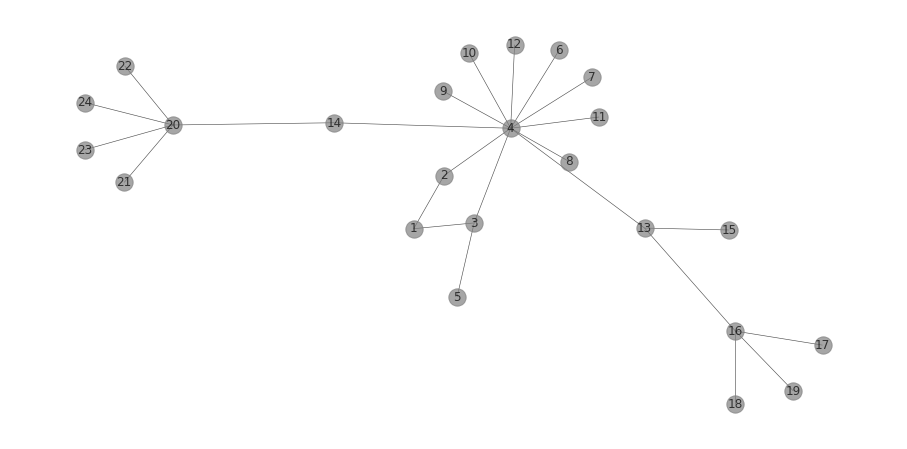

In [27]:
nodes = nx.node_connected_component(G, '14')
component = nx.induced_subgraph(G, nodes)
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
nx.draw_spring(component, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

Ci-dessous, on visualise l'arbre de parcours BFS (Breadth first search = parcours en largeur) opéré par networkx à partir du noeud 5. Pour visualiser cet arbre, j'ai opté pour un layout planaire, d'où l'utilisation de la fonction `draw_planar`.
Réaliser en dessous une visualisation du même genre pour l'arbre de parcours dfs en utilisant la fonction `dfs_tree(graph, node)`. L'arbre est-il le même ?

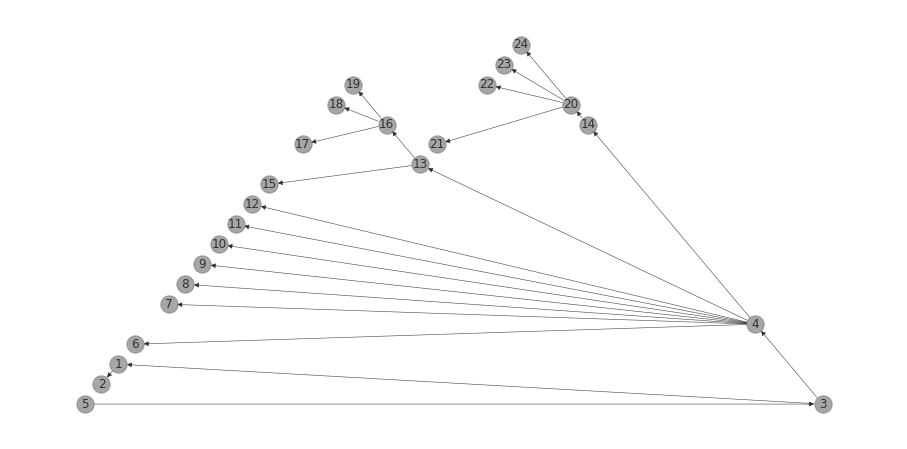

In [32]:
tree=nx.bfs_tree(G, '5')
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
nx.draw_planar(tree, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

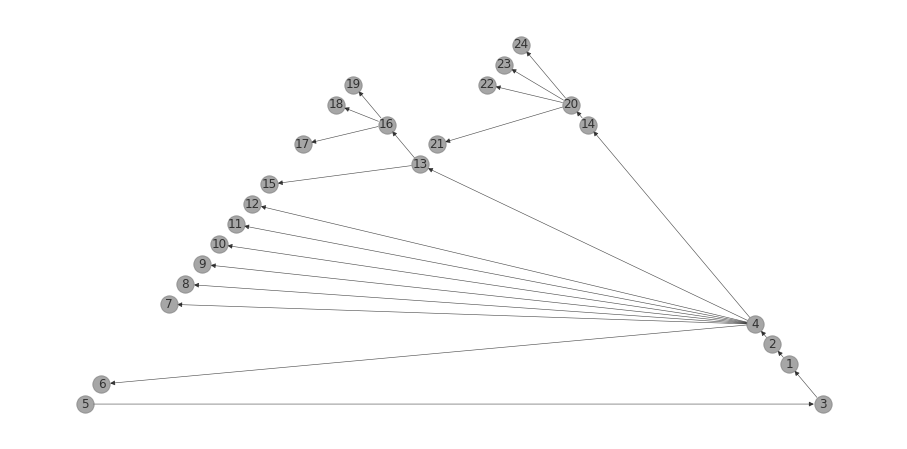

In [33]:
tree=nx.dfs_tree(G, '5')
fig, ax = plt.subplots()
fig.set_size_inches(16,8)
nx.draw_planar(tree, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

À vous maintenant de reproduire le BFS et le DFS en utilisant les fonctions networkx. Les sommets parcourus doivent exactement correspondre au résultat retourné par `nx.node_connected_component(graph, node)`.
Pour ce faire, nous allons utiliser une collection de type `set` qui nous permettra de stocker les sommets parcourus et de rapidement savoir si un sommet est dans ce set.

Tips pour utiliser un set en Python : 
```
p = set()
p.add(5)
if 5 in p:
    print("dedans")
else:
    print("il n'y est pas")
```

Tout d'abord, commençons par le DFS qui est le plus simple des deux algorithmes à implémenter.

In [42]:
def dfs(G, start, E):
    E.add(start)
    for u in G.neighbors(start):
        if u not in E:
            dfs(G, u, E)
    return E

In [43]:
E=set()
dfs(G, '14', E) == nx.node_connected_component(G, '14')

True

Maintenant, passons au BFS ! Pour implémenter le BFS, il nous faut une collection file (FIFO, First in First Out).

Tips pour utiliser une file en Python :
```
import queue
file = queue.Queue()
file.put(1)
file.put(2)
file.get() # retourne 1
```

In [41]:
import queue
def bfs(G,file,E):
    if not file.empty():
        s = file.get()
        print("Appel bfs\tS : "+s+"\tE :"+str(E))
        E.add(s)
        for u in G.neighbors(s):
            if u not in E:
                file.put(u)
        return bfs(G, file, E)
    else:
        return E

In [45]:
E=set()
file = queue.Queue()
file.put("14")
bfs(G, file, E) == nx.node_connected_component(G, '14')

Appel bfs	S : 14	E :set()
Appel bfs	S : 4	E :{'14'}
Appel bfs	S : 20	E :{'4', '14'}
Appel bfs	S : 2	E :{'20', '4', '14'}
Appel bfs	S : 3	E :{'20', '4', '2', '14'}
Appel bfs	S : 6	E :{'4', '3', '2', '20', '14'}
Appel bfs	S : 7	E :{'4', '3', '6', '2', '20', '14'}
Appel bfs	S : 8	E :{'4', '3', '7', '6', '2', '20', '14'}
Appel bfs	S : 9	E :{'4', '3', '7', '6', '8', '2', '20', '14'}
Appel bfs	S : 10	E :{'4', '3', '7', '6', '8', '2', '20', '9', '14'}
Appel bfs	S : 11	E :{'4', '3', '10', '7', '6', '8', '2', '20', '9', '14'}
Appel bfs	S : 12	E :{'4', '3', '10', '7', '6', '8', '11', '2', '20', '9', '14'}
Appel bfs	S : 13	E :{'4', '3', '10', '12', '7', '6', '8', '11', '2', '20', '9', '14'}
Appel bfs	S : 21	E :{'4', '3', '10', '12', '7', '6', '8', '11', '13', '2', '20', '9', '14'}
Appel bfs	S : 22	E :{'4', '3', '10', '12', '7', '6', '8', '11', '13', '2', '20', '21', '9', '14'}
Appel bfs	S : 23	E :{'22', '4', '3', '10', '12', '7', '6', '8', '11', '13', '2', '20', '21', '9', '14'}
Appel bfs	S : 24	

True

Beginning file download with urllib2...


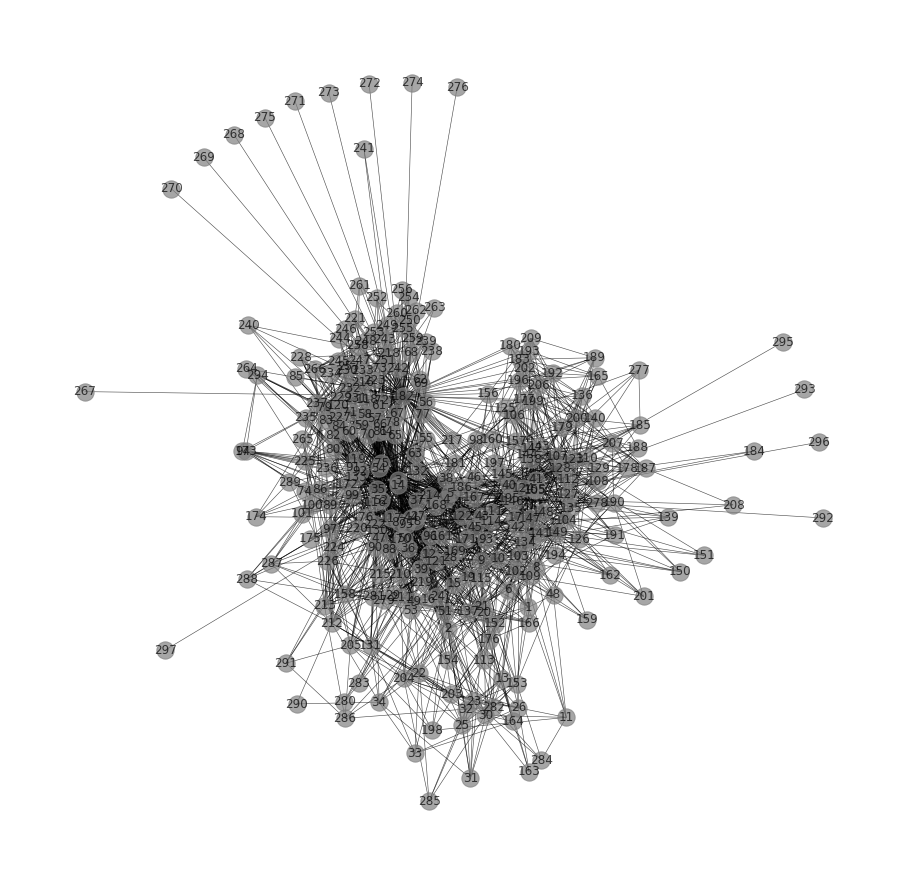

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import urllib.request

print('Beginning file download with urllib2...')

url = 'http://konect.cc/files/download.tsv.dimacs10-celegansneural.tar.bz2'
urllib.request.urlretrieve(url, 'celegans.bz2')

import tarfile
tar = tarfile.open("celegans.bz2", "r:bz2")  
tar.extractall()
tar.close()

G = nx.read_weighted_edgelist("dimacs10-celegansneural/out.dimacs10-celegansneural",comments='%')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
nx.draw_spring(G, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()


### Exercice III.1 : Apprendre à connaître C. Elegans

Dans un premier temps, nous allons découvrir les propriétés qui correspondent au réseau de neurones de C. Elegans, avant ensuite de générer un graphe dont on espère qu'il sera capable de reproduire ces propriétés.

Pour commencer, imprimer le nombre de sommets et d'arêtes dans le graphe de C. Elegans chargé dans la cellule auparavant.

In [19]:
print(G.number_of_nodes())
print(G.number_of_edges())

297
2148


Obtenir le degré des sommets. Puis, en utilisant `Counter` du package collections, récupérer le nombre de sommets correspondant à chaque degré. Utiliser la fonction `bar` de *matplotlib.pyplot* pour produire le barchart correspondant à la distribution des degrés.

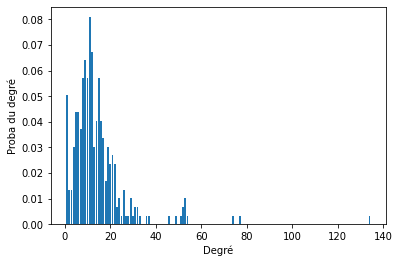

In [22]:
def plot_degree(G_):
    import collections
    import numpy as np
    plt.figure()
    degrees = [degree for node, degree in G_.degree()]
    c = collections.Counter(degrees)
    values = [v/np.sum(list(c.values())) for v in c.values()]
    plt.bar(c.keys(), values)
    plt.xlabel("Degré")
    plt.ylabel("Proba du degré")
    plt.show()
plot_degree(G)

Quel est le degré moyen dans le graphe ? Vous pouvez vous aider de la fonction `mean` du package numpy.

In [23]:
import numpy as np
np.mean([degree for node, degree in G.degree()])

14.464646464646465

### Exercice III.2 : Modéliser avec Erdös-Rényi

Maintenant, nous allons générer un graphe aléatoire dont les propriétés doivent imiter celles de C. Elegans.

Étant donné le nombre de sommets et d'arêtes, quels sont les paramètres que vous choisissez pour générer votre graphe aléatoire selon le modèle d'Erdös-Rényi ?

In [33]:
n=297
m=2148
p = m / (n * (n-1) / 2)
p

0.048867048867048866

Générer un graphe aléatoirement en utilisant le modèle d'Erdös-Rényi.

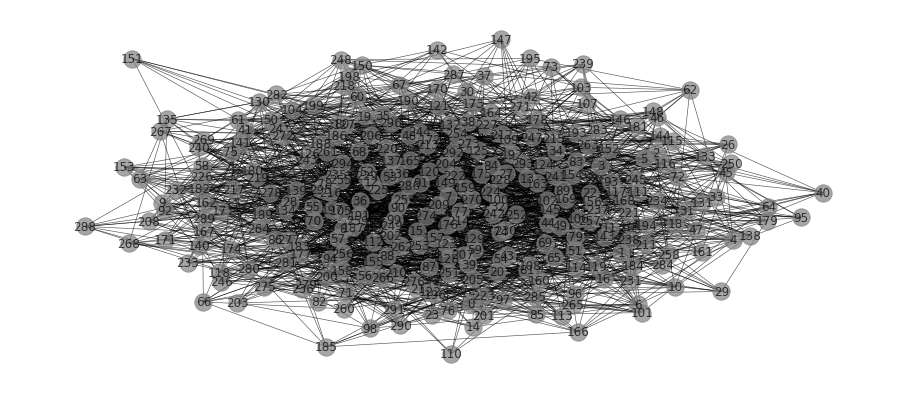

In [28]:
from networkx import erdos_renyi_graph
n=297
p=0.05

G=erdos_renyi_graph(n, p)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(16,7)
nx.draw_spring(G, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

Imprimer le nombre de sommets et d'arêtes dans le graphe généré aléatoirement. Ceux-ci correspondent-il (à quelques dizaines d'arêtes près) aux chiffres obtenus sur C. Elegans ?

In [29]:
print(G.number_of_nodes())
print(G.number_of_edges())

297
2266


Calculer la distribution des degrés sur le graphe généré aléatoirement. Celle-ci correspond-il à celle obtenue sur C. Elegans ?

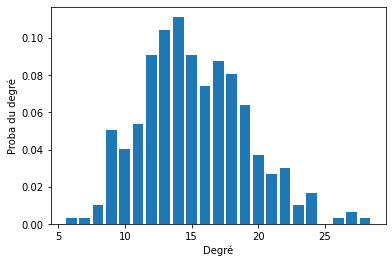

In [30]:
plot_degree(G)

Quid du degré moyen sur le graphe généré aléatoirement ?

In [31]:
np.mean([degree for node, degree in G.degree()])

15.25925925925926

### Exercice IV : Graphes de co-occurrences

Dans cet exercice, nous allons créer un graphe de co-occurrences de mots et le visualiser. Le texte qui sera utilisé pour créer ce graphe sera extrait directement de la page wikipedia sur la théorie des graphes. Pour cela, nous fournissons une partie du code qui vous aidera à créer ce graphe de co-occurrences. Il vous faut installer le package `wikipedia` avec `pip --user install wikipedia` dans le terminal linux.

In [3]:
#Étape 1 : Récupère dans la variable text le contenu de la page wikipedia
import wikipedia
wikipedia.set_lang("fr")
wiki = wikipedia.page('Théorie_des_graphes')
text = wiki.content
text=text.replace("=","")
text=text.replace("\n","")
text[:2000]

"La théorie des graphes est la discipline mathématique et informatique qui étudie les graphes, lesquels sont des modèles abstraits de dessins de réseaux reliant des objets. Ces modèles sont constitués par la donnée de sommets (aussi appelés nœuds ou points, en référence aux polyèdres), et d'arêtes (aussi appelées liens ou lignes) entre ces sommets ; ces arêtes sont parfois non-symétriques (les graphes sont alors dits orientés) et sont appelées des flèches ou des arcs.Les algorithmes élaborés pour résoudre des problèmes concernant les objets de cette théorie ont de nombreuses applications dans tous les domaines liés à la notion de réseau (réseau social, réseau informatique, télécommunications, etc.) et dans bien d'autres domaines (par exemple génétique) tant le concept de graphe, à peu près équivalent à celui de relation binaire (à ne pas confondre donc avec graphe d'une fonction), est général. De grands théorèmes difficiles, comme le théorème des quatre couleurs, le théorème des graphe

In [4]:
#Étape 2 : Supprime la ponctuation
import string
text_sans_ponctuation = text.translate(str.maketrans('', '', string.punctuation))
text_sans_ponctuation[:2000]

'La théorie des graphes est la discipline mathématique et informatique qui étudie les graphes lesquels sont des modèles abstraits de dessins de réseaux reliant des objets Ces modèles sont constitués par la donnée de sommets aussi appelés nœuds ou points en référence aux polyèdres et darêtes aussi appelées liens ou lignes entre ces sommets  ces arêtes sont parfois nonsymétriques les graphes sont alors dits orientés et sont appelées des flèches ou des arcsLes algorithmes élaborés pour résoudre des problèmes concernant les objets de cette théorie ont de nombreuses applications dans tous les domaines liés à la notion de réseau réseau social réseau informatique télécommunications etc et dans bien dautres domaines par exemple génétique tant le concept de graphe à peu près équivalent à celui de relation binaire à ne pas confondre donc avec graphe dune fonction est général De grands théorèmes difficiles comme le théorème des quatre couleurs le théorème des graphes parfaits ou encore le théorèm

In [5]:
#Étape 3 : Sépare le texte en mots
text_motamot = text_sans_ponctuation.split(" ")
text_motamot[:20]

['La',
 'théorie',
 'des',
 'graphes',
 'est',
 'la',
 'discipline',
 'mathématique',
 'et',
 'informatique',
 'qui',
 'étudie',
 'les',
 'graphes',
 'lesquels',
 'sont',
 'des',
 'modèles',
 'abstraits',
 'de']

In [6]:
#Étape 4 : Supprime les mots de syntaxe: et, ou, le, etc

#4.1 Télécharge la liste des mots de syntaxe
import urllib
urllib.request.urlretrieve('https://raw.githubusercontent.com/Fantomas42/mots-vides/develop/mots_vides/datas/french.txt', 'stopwords.txt')
fichier = open('stopwords.txt')
stopwords=set()
for ligne in fichier:
    stopwords.add(ligne.strip())
fichier.close()

#4.2 Supprime les mots de syntaxes
text_without_stopwords = [f.lower() for f in text_motamot if f.lower() not in stopwords and len(f) > 1]
text_without_stopwords[:20]

['théorie',
 'graphes',
 'discipline',
 'mathématique',
 'informatique',
 'étudie',
 'graphes',
 'modèles',
 'abstraits',
 'dessins',
 'réseaux',
 'reliant',
 'objets',
 'modèles',
 'constitués',
 'donnée',
 'sommets',
 'appelés',
 'nœuds',
 'points']

In [7]:
#Étape 5 : Obtenir les mots les plus fréquents
import collections
dico =collections.Counter(text_without_stopwords)
dico.most_common(10)

[('displaystyle', 97),
 ('graphe', 92),
 ('graphes', 58),
 ('sommets', 56),
 ('sommet', 34),
 ('dun', 32),
 ('problème', 25),
 ('arête', 24),
 ('lon', 20),
 ('arêtes', 19)]

In [16]:
#Étape 6 : Établissement du vocabulaire utilisé pour le graphe, les 70 mots les plus fréquents du texte
vocabulaire = dico.most_common(70)
vocabulaire = [x[0] for x in vocabulaire]
vocabulaire[:10]

['displaystyle',
 'graphe',
 'graphes',
 'sommets',
 'sommet',
 'dun',
 'problème',
 'arête',
 'lon',
 'arêtes']

In [17]:
#Étape 7 : Récupération des phrases
import re
sentences = re.split(r' *[\.\?!][\'"\)\]]* *', text)
sentences=[s.translate(str.maketrans('', '', string.punctuation)) for s in sentences]
sentences[:10]

['La théorie des graphes est la discipline mathématique et informatique qui étudie les graphes lesquels sont des modèles abstraits de dessins de réseaux reliant des objets',
 'Ces modèles sont constitués par la donnée de sommets aussi appelés nœuds ou points en référence aux polyèdres et darêtes aussi appelées liens ou lignes entre ces sommets  ces arêtes sont parfois nonsymétriques les graphes sont alors dits orientés et sont appelées des flèches ou des arcs',
 'Les algorithmes élaborés pour résoudre des problèmes concernant les objets de cette théorie ont de nombreuses applications dans tous les domaines liés à la notion de réseau réseau social réseau informatique télécommunications etc',
 'et dans bien dautres domaines par exemple génétique tant le concept de graphe à peu près équivalent à celui de relation binaire à ne pas confondre donc avec graphe dune fonction est général',
 'De grands théorèmes difficiles comme le théorème des quatre couleurs le théorème des graphes parfaits ou

In [18]:
import networkx as nx
vocabulaire=set(vocabulaire)
G=nx.Graph()
#G.add_edge("a", "b", weight=0.6)
for s in sentences:
    ensemble=[]
    for w in s.split(" "):
        if w in vocabulaire:
            ensemble.append(w)
    if len(ensemble) >=2:
        ensemble.sort()
        for idx, u in enumerate(ensemble):
            for v in ensemble[idx+1:]:
                if G.has_edge(u,v):
                    G[u][v]['weight'] += 1
                else:
                    G.add_edge(u,v, weight=1)
        

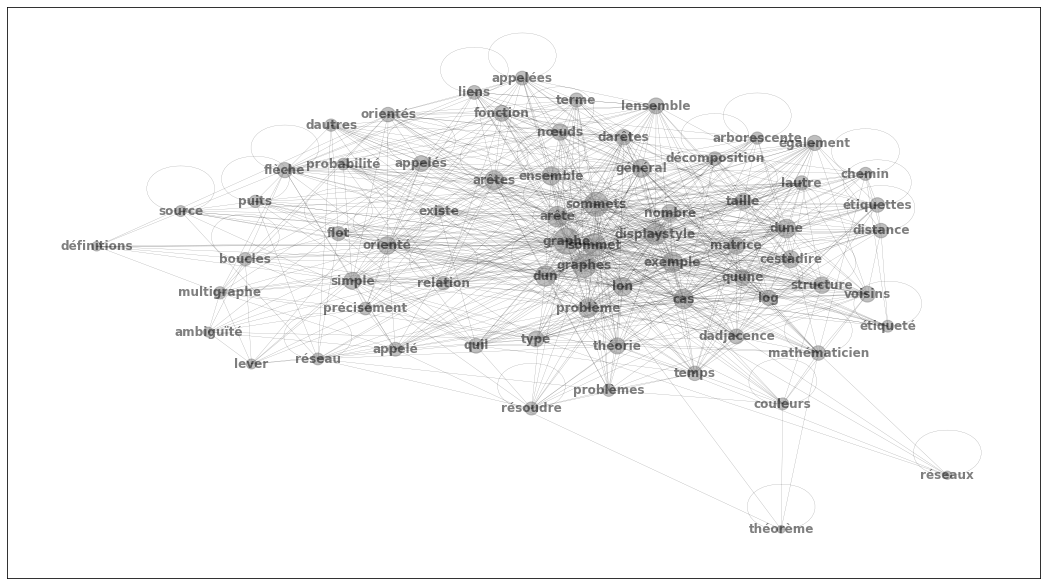

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

degrees = [val*10 for (node, val) in G.degree()]

options = {"node_color": "gray", "node_size": degrees, "width": 0.2, "with_labels":True, "font_color":"black", "font_weight":"bold", "ax":ax, "alpha": 0.5}
pos = nx.spring_layout(G,seed=1969)  # Seed for reproducible layout

nx.draw_networkx(G, pos,**options)
plt.show()